In [1]:
import warnings
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from brain_decoding.config.file_path import RESULT_PATH
from brain_decoding.utils.analysis import (
    prediction_curve, correlation_heatmap, smooth_columns, combine_continuous_scores, stage_box_plot, read_sleep_score,
    correlation_heatmap_by_stage, multi_facet_correlation_heatmap, load_prediction, CONCEPT_LABELS as labels
)
# Suppress all UserWarning messages
warnings.filterwarnings('ignore', category=UserWarning)

activation_path = os.path.join(
    RESULT_PATH, 
    '8concepts/562_None_multi-vit_test_optimalX_CARX_2024-10-23_16-09-32/memory/prediction/epoch40_test_sleep_3_results.npy'
)

sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/562/EXP6_Movie24&562_firstpass.csv'

file_path = os.path.dirname(activation_path)

predictions = load_prediction(activation_path)
sleep_score = read_sleep_score(sleep_score_file)
sleep_score.head(5)

shape of predictions: (127791, 8), duration: 8.874375 hours
shape of sleep_score: (1065, 1), duration: 8.875 hours
shape of sleep_score after merge: (55, 2)


,Score,start_index
0,Wake/REM,0
1,SWS,18000
2,Wake/REM,18120
3,SWS,18840
4,Wake/REM,33840


Total duration of sleep data is 5 hours, the sampling interval for `predictions` is .25 seconds
Each label in the sleep score file is 30 seconds.

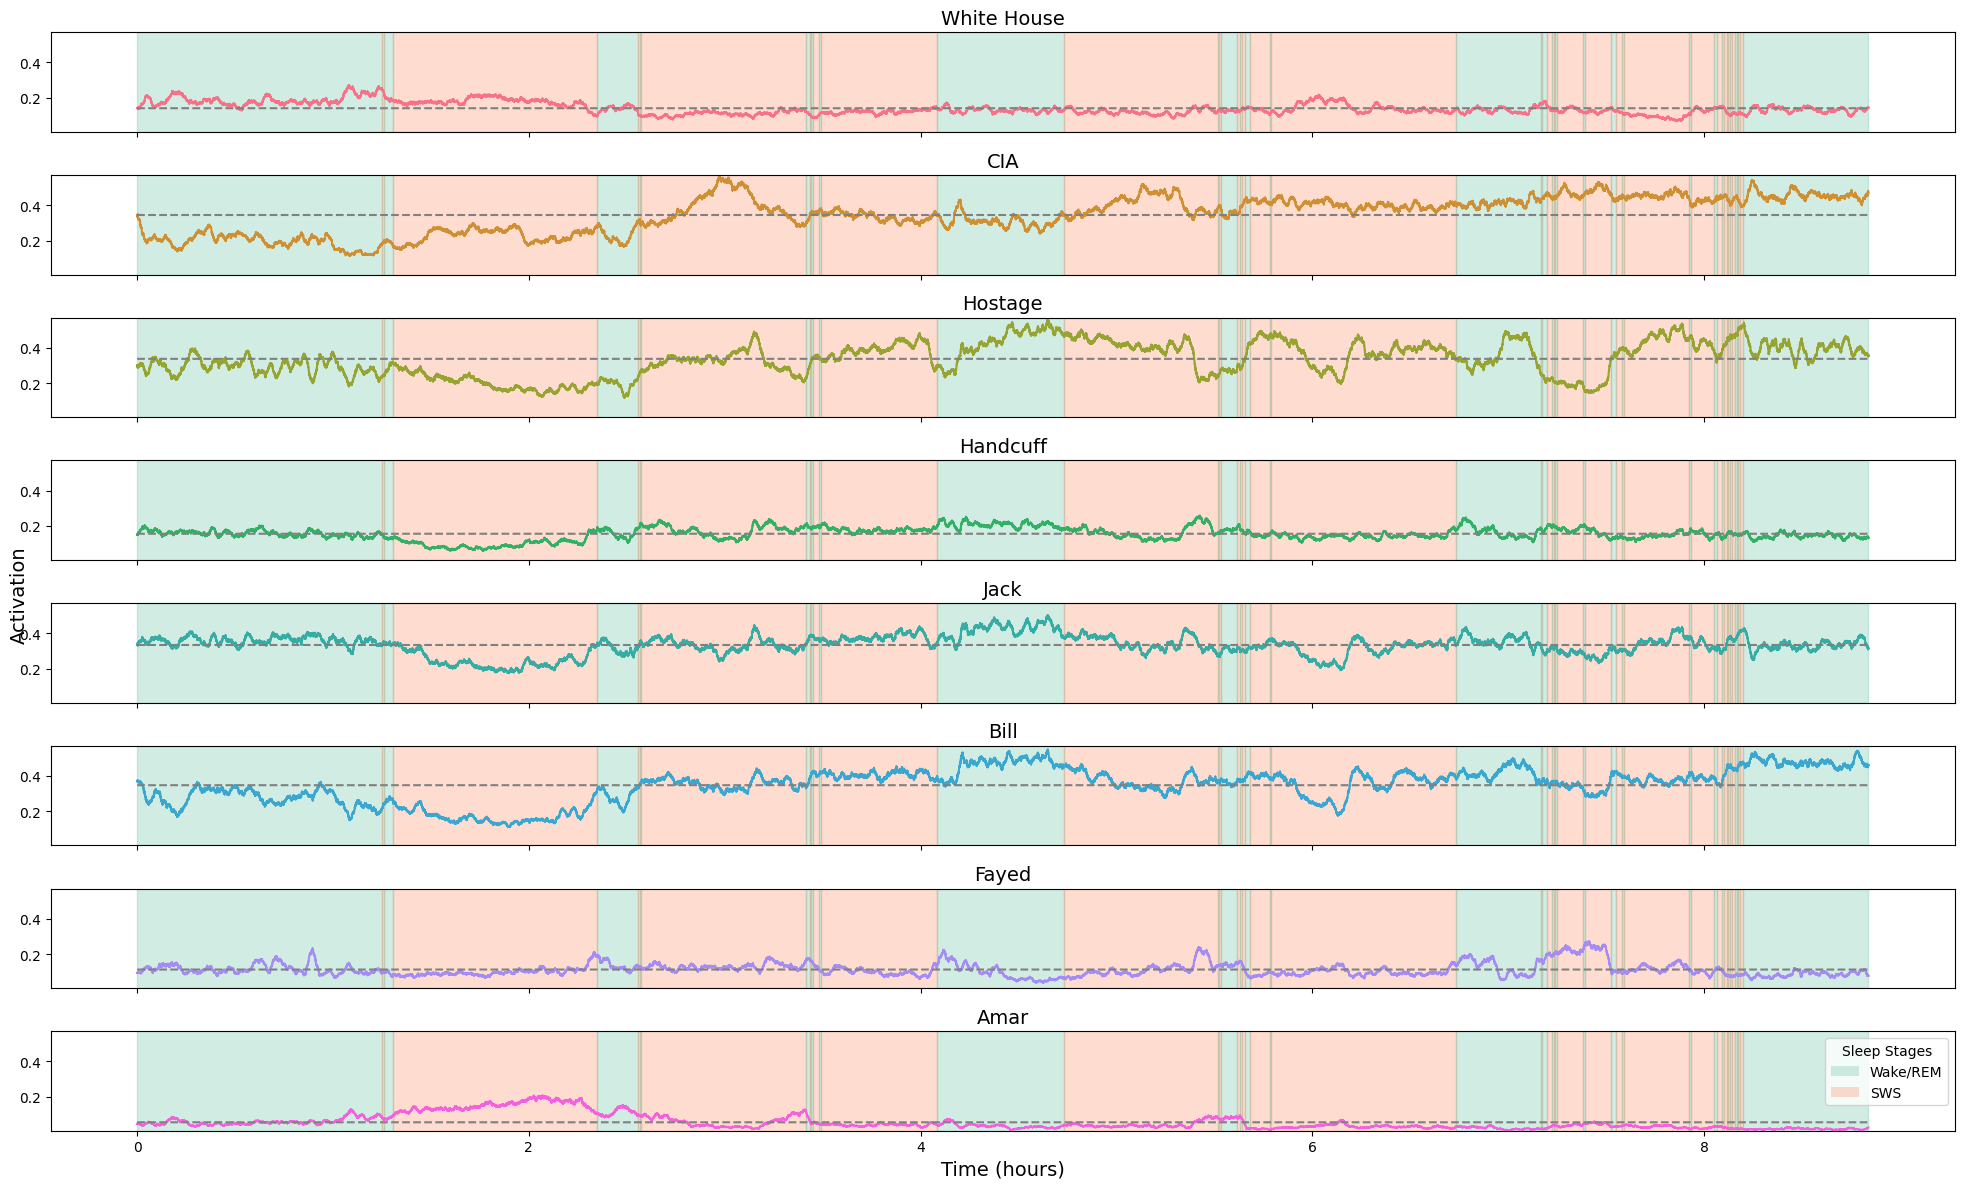

In [2]:
# Function to apply moving average smoothing
window_size = 500
result_path = os.path.join(file_path, 'epoch40_activation.png')
smoothed_predictions = smooth_columns(predictions, window_size)
prediction_curve(smoothed_predictions, sleep_score, labels, result_path)

## Box plot of prediction values (>.5) for each sleep stage. 
Stages shorter than 10 mins are excluded

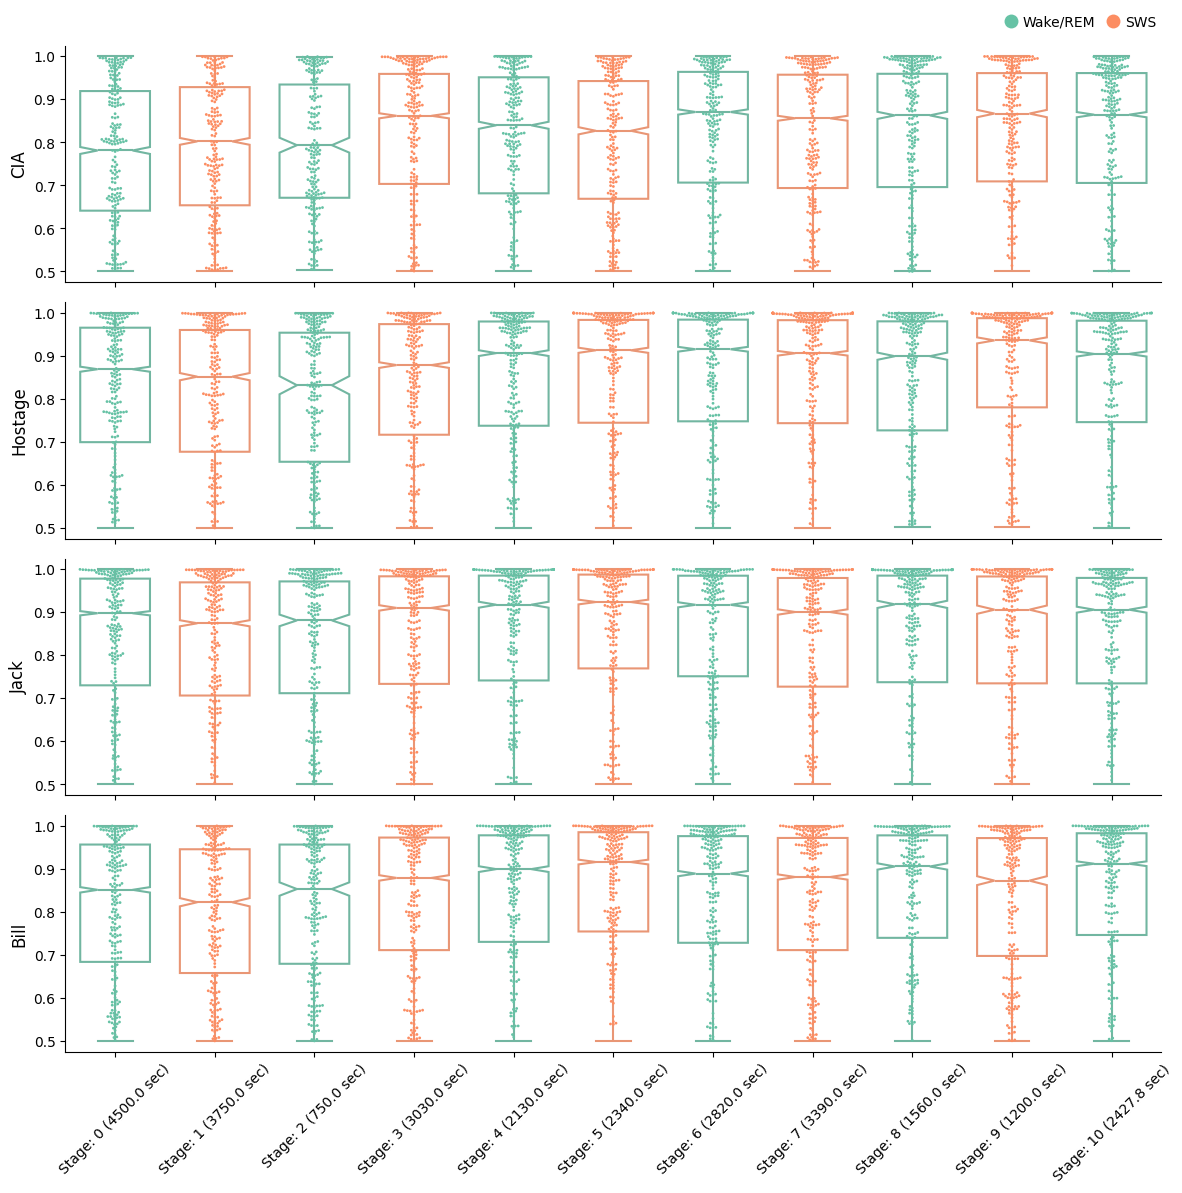

In [3]:
col_idx = [1,2,4,5]
result_path = os.path.join(file_path, 'epoch40_activation_box.png')
stage_box_plot(predictions[:, col_idx], sleep_score, [labels[i] for i in col_idx], result_path)

## Correlation of activations for each concept

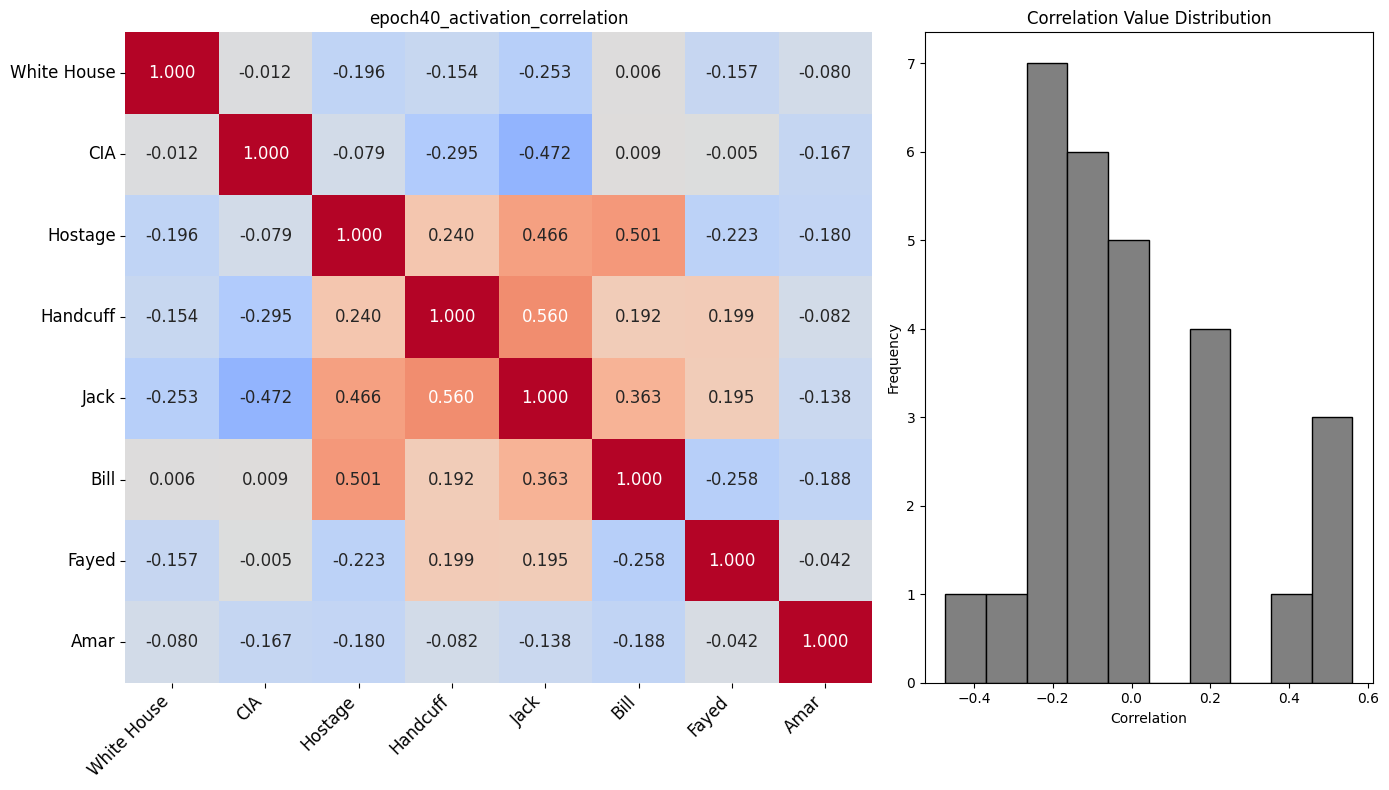

In [4]:
result_path = os.path.join(file_path, 'epoch40_activation_correlation.png')
correlation_heatmap(predictions, labels, result_path)

## correlation of activations for each sleep stage
Only stages longer than 10 mins are included.

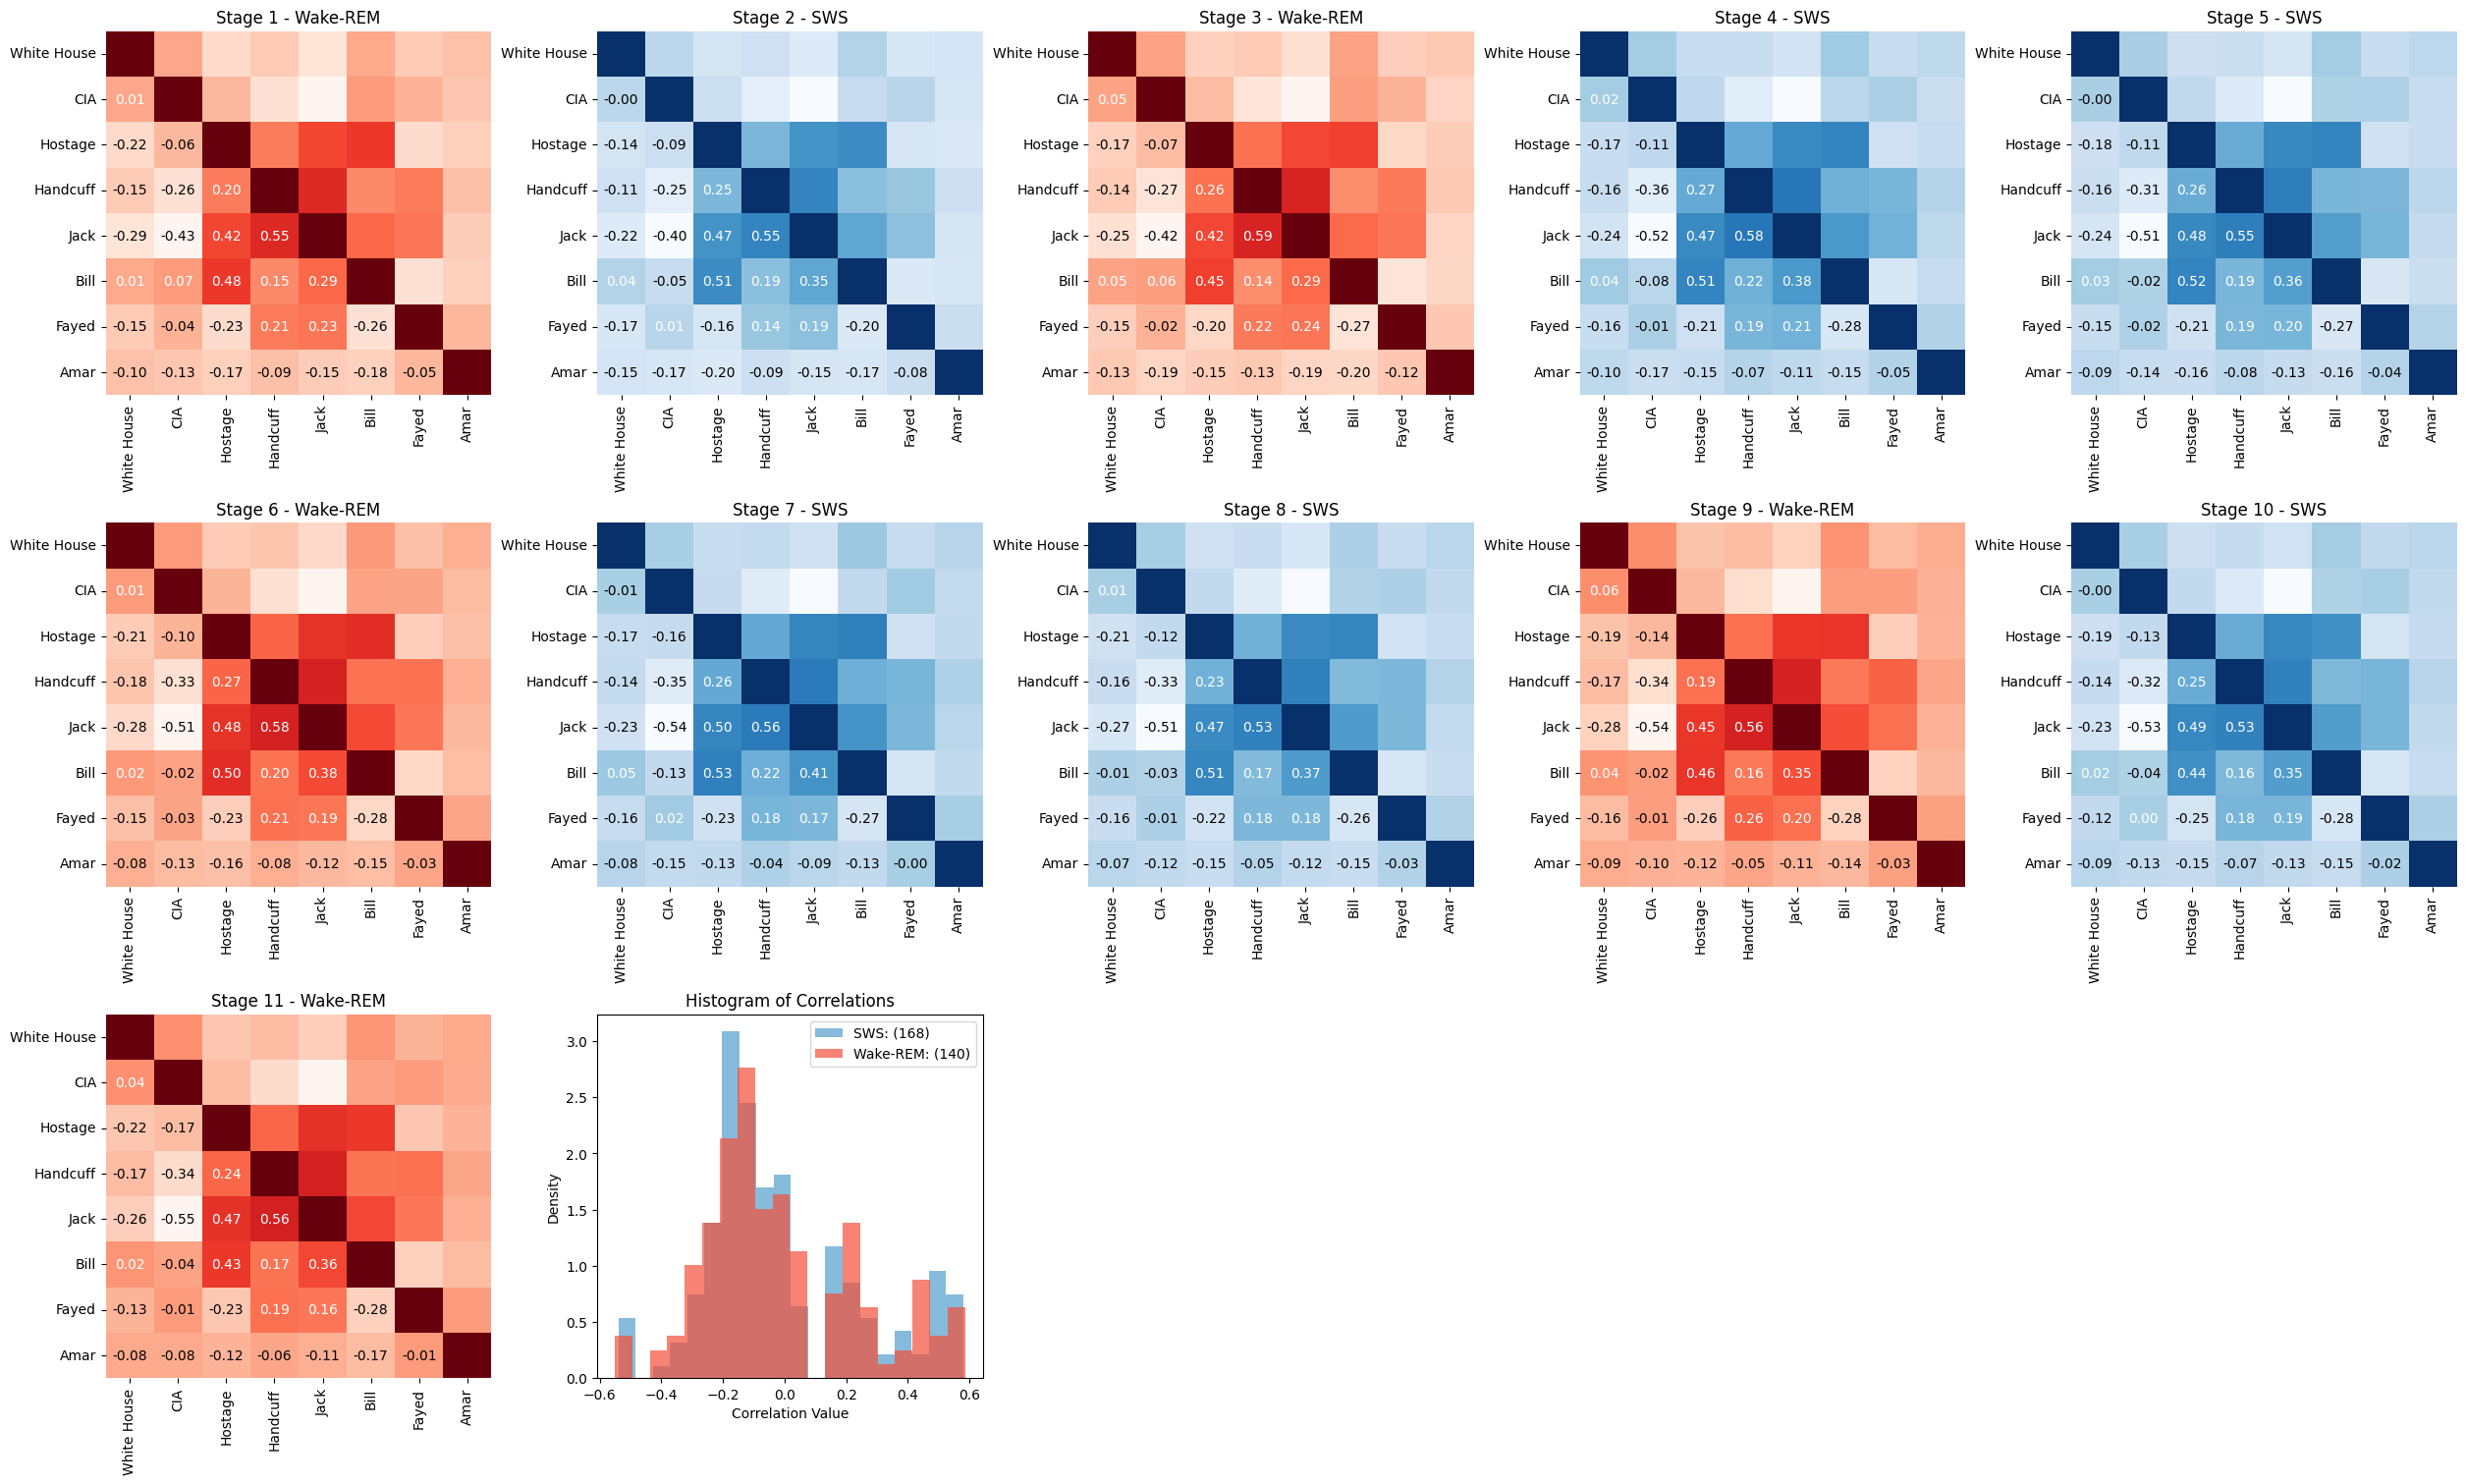

In [5]:
result_path = os.path.join(file_path, 'epoch40_activation_correlation_by_stage.png')
multi_facet_correlation_heatmap(predictions, labels, sleep_score, result_path)